In [ ]:
import archive.settransducer as settransducer
from archive import setmedium
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [ ]:
def generateField(trans,medium,field,iscomplete=0):
    """
    INPUT ARG
        trans == dictionary of transducer properties
            "freq" = [Hz]
            "radius" = [m]
            "focus" = [m]
            "initPressure" = [Pa]
        medium == calls medium properties
            "speed" = [m/s]
            "density" = [kg/m^3]
            "absCoeff" = [Np/(m*MHz^2)]
        field == calls 2D field properties
            "numAxialStep"
            "numRadialStep"

    OUTPUT ARG
        pressure_field == resulting rayleigh integral pressure field

    """
    import numpy as np

    # Edit and Transform Transducer Properties
    d = trans["focus"]
    k = 2 * np.pi * trans["freq"] / medium["speed"] # Wave Number
    angularF = trans["radius"]/trans["focus"] # Angular Frequency
    abs_Coeff = medium["absCoeff"] * (pow((trans["freq"]/(1e6)),2)) # POWER LAW


    # Set Axes
    axial_min = 0.001
    axial_max = 2*d
    radial_min = -trans["radius"]
    dz = (axial_max - axial_min) / field["numAxialStep"]
    numZ = int(np.round((axial_max - axial_min)/dz)+1)
    dr = -1 * radial_min / (field["numRadialStep"]/2)
    numR = int(np.round((0 - radial_min)/dr)+1)
    # Theta Component
    thetaMax = np.arcsin(angularF)
    numT = 100
    dtheta = thetaMax/numT


    # Preallocation
    z_values = np.zeros((numZ,1))
    r_values = np.zeros((numR,1))
    pressure_field = np.zeros((numZ,numR))

    # Rayleigh Integral
    z = axial_min
    for zz in range(0,numZ-1,1):
        r = radial_min
        for rr in range(0,numR-1,1):
            p = 0.5 * np.exp(1j * k * np.sqrt(z*z + r*r)) / np.sqrt(z*z + r*r) * dtheta
            for tt in range(1,numT-1):
                theta = tt * dtheta
                numP = (2*tt+1)
                dphi = (2*np.pi)/numP
                e1 = 0
                for pp in range(0,numP-1):
                    phi = dphi * pp
                    rf = np.sqrt((pow((d*np.sin(theta)),2))+r*r-2*np.sin(theta)*np.absolute(r)*d*np.cos(phi)+pow((z-d+d*np.cos(theta)),2))
                    e1 = e1 + np.exp(1j*k*rf)/rf
                p = p + e1*np.sin(theta)/(2*tt+1)
            amplitude = abs(p)*k*d*d*dtheta*np.exp(-abs_Coeff*(z-axial_min))
            pressure_field[zz+1,rr+1] = amplitude
            r_values[rr] = float(r)
            r = r + dr
        z_values[zz] = float(z)
        z = z + dz
        print((np.round(100 * (zz+1)/numZ)),'%')
    
    # Set Bottom Halves
    r_value_bothalf = r_values
    pressure_field_bothalf = pressure_field

    # Radial Symmetry (reflect pressure values across z-axis)
    pressure_field_tophalf = np.fliplr(pressure_field_bothalf)
    pressure_field_new = np.rot90(np.hstack((pressure_field_bothalf,pressure_field_tophalf[:,1:])),1)
    r_value_tophalf = np.flipud(np.absolute(r_value_bothalf))
    r_value_new = np.concatenate((r_value_bothalf,r_value_tophalf[1:]))

    # Fix Dividing by 0 at the first center point
    r_CenterIdx = round((-1*radial_min/dr))
    r_value_new[r_CenterIdx] = 1e-20
    pressure_field_new[r_CenterIdx,0] = 0

    print('Rayleigh Integral Complete')
    iscomplete = 1
    return pressure_field_new, z_values, r_value_new, iscomplete

In [ ]:
# trans = settransducer.setTransducer(1e6,0.02,0.05,1)
# medium = setmedium.setMedium('Water',dict())
# field = dict(numAxialStep = 100, numRadialStep= 100)

# pressure_field, z_values, r_values, iscomplete = generateField(trans,medium,field)

1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.0 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.0 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.0 %
29.0 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.0 %
56.0 %
57.0 %
58.0 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %
Rayleigh Integral Complete


In [2]:
def generateField2(trans,medium,field,iscomplete=0):
    """
    INPUT ARG
        trans == dictionary of transducer properties
            "freq" = [Hz]
            "radius" = [m]
            "focus" = [m]
            "initPressure" = [Pa]
        medium == calls medium properties
            "speed" = [m/s]
            "density" = [kg/m^3]
            "absCoeff" = [Np/(m*MHz^2)]
        field == calls 2D field properties
            "numAxialStep"
            "numRadialStep"

    OUTPUT ARG
        pressure_field == resulting rayleigh integral pressure field

    """
    import numpy as np
    import pandas as pd

    # Edit and Transform Transducer Properties
    d = trans["focus"]
    k = 2 * np.pi * trans["freq"] / medium["speed"] # Wave Number
    angularF = trans["radius"]/trans["focus"] # Angular Frequency
    abs_Coeff = medium["absCoeff"] * (pow((trans["freq"]/(1e6)),2)) # POWER LAW

    # Set Axes
    axial_min = 0.001
    axial_max = 2*d
    radial_min = -trans["radius"]
    dz = (axial_max - axial_min) / field["numAxialStep"]
    numZ = int(np.round((axial_max - axial_min)/dz)+1)
    dr = -1 * radial_min / (field["numRadialStep"]/2)
    numR = int(np.round((0 - radial_min)/dr)+1)
    # Theta Component
    thetaMax = np.arcsin(angularF)
    numT = 100
    dtheta = thetaMax/numT


    # Preallocation
    z_values = list()
    r_values = list()
    pressure_field = np.empty((numZ,numR), dtype=float)

    # Rayleigh Integral
    z = axial_min
    for zz in range(0,numZ):
        r = radial_min
        for rr in range(0,numR):
            p = 0.5 * np.exp(1j * k * np.sqrt(z*z + r*r)) / np.sqrt(z*z + r*r) * dtheta
            for tt in range(1,numT+1):
                theta = tt * dtheta
                numP = (2*tt+1)
                dphi = (2*np.pi)/numP
                e1 = 0
                for pp in range(0,numP):
                    phi = dphi * pp
                    rf = np.sqrt((pow((d*np.sin(theta)),2))+r*r-2*np.sin(theta)*np.absolute(r)*d*np.cos(phi)+pow((z-d+d*np.cos(theta)),2))
                    e1 = e1 + np.exp(1j*k*rf)/rf
                p = p + e1*np.sin(theta)/(2*tt+1)
            amplitude = abs(p)*k*d*d*dtheta*np.exp(-abs_Coeff*(z-axial_min))
            pressure_field[zz,rr] = amplitude
            if zz == 0: 
                r_values.append(r)
            r = r + dr

        z_values.append(z)
        z = z + dz
        print((np.round(100 * (zz+1)/numZ)),'%')
    
    # Set Bottom Halves
    r_value_bothalf = r_values
    pressure_field_bothalf = pressure_field

    # Radial Symmetry (reflect pressure values across z-axis)
    pressure_field_tophalf = np.fliplr(pressure_field_bothalf)
    pressure_field_new = np.rot90(np.hstack((pressure_field_bothalf,pressure_field_tophalf[:,1:])),1)
    r_value_tophalf = np.flipud(np.absolute(r_value_bothalf))
    r_value_new = np.concatenate((r_value_bothalf,r_value_tophalf[1:]))

    # Fix Dividing by 0 at the first center point
    r_CenterIdx = round((-1*radial_min/dr))
    r_value_new[r_CenterIdx] = 1e-20
    pressure_field_new[r_CenterIdx,0] = 0

    # Convert to Panda Data Frame
    pressure_DF = pd.DataFrame(pressure_field_new)

    print('Rayleigh Integral Complete')
    iscomplete = 1
    return pressure_DF, z_values, r_value_new, iscomplete

In [3]:
trans = settransducer.setTransducer(1e6,0.02,0.05,1)
medium = setmedium.setMedium('Water',dict())
field = dict(numAxialStep = 100, numRadialStep= 100)

pressure_field, z_values, r_values, iscomplete = generateField2(trans,medium,field)

1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.0 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.0 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.0 %
29.0 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.0 %
56.0 %
57.0 %
58.0 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %
100.0 %
Rayleigh Integral Complete


In [113]:
print(z_values)

[0.001, 0.00199, 0.00298, 0.00397, 0.004959999999999999, 0.005949999999999999, 0.006939999999999998, 0.007929999999999998, 0.008919999999999997, 0.009909999999999997, 0.010899999999999996, 0.011889999999999996, 0.012879999999999996, 0.013869999999999995, 0.014859999999999995, 0.015849999999999996, 0.016839999999999997, 0.01783, 0.01882, 0.01981, 0.020800000000000003, 0.021790000000000004, 0.022780000000000005, 0.023770000000000006, 0.024760000000000008, 0.02575000000000001, 0.02674000000000001, 0.02773000000000001, 0.028720000000000013, 0.029710000000000014, 0.030700000000000015, 0.03169000000000002, 0.032680000000000015, 0.03367000000000001, 0.03466000000000001, 0.03565000000000001, 0.036640000000000006, 0.037630000000000004, 0.03862, 0.03961, 0.0406, 0.041589999999999995, 0.04257999999999999, 0.04356999999999999, 0.04455999999999999, 0.045549999999999986, 0.046539999999999984, 0.04752999999999998, 0.04851999999999998, 0.04950999999999998, 0.050499999999999975, 0.05148999999999997, 0.

In [9]:
fig = px.imshow(
    pressure_field,
    x = z_values,
    y = r_values,
    aspect='auto',
    origin='lower',
    color_continuous_scale='jet', 
)
fig.show()

In [ ]:
# trans = settransducer.setTransducer(1e6,0.02,0.05,1)
# medium = setmedium.setMedium('Water',dict())
# field = dict(numAxialStep = 100, numRadialStep= 100)

# pressure_field, z_values, r_values, iscomplete, r_value_tophalf, r_value_bothalf = generateField(trans,medium,field)

0.00099
101
0.0004
51
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.0 %
8.0 %
9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.0 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.0 %
29.0 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.0 %
56.0 %
57.0 %
58.0 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %
50
Rayleigh Integral Complete


In [ ]:
# testy = np.linspace(0,0.01,100)
# testx = np.linspace(0,0.01,101)
# 
# fig = px.imshow(
#     pressure_field_test,
#     x = testx,
#     y = testy,
#     aspect='auto',
#     color_continuous_scale='jet', 
# )
# fig.show()

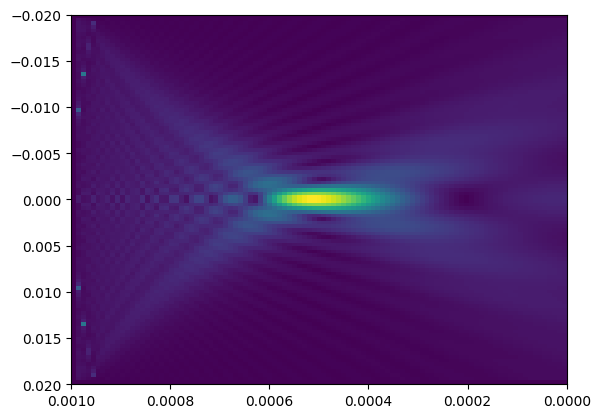

In [25]:
fig = plt.imshow(
    pressure_field,
    extent=[z_values[0],z_values[-1], r_values[-1], r_values[0]],
    origin='lower',
    aspect = "auto",  # auto
    interpolation = 'none',
    )

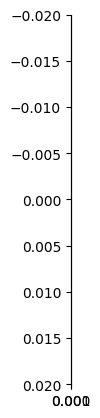

In [12]:
# Comparison with MATLAB Data

testPressureData = pd.read_csv(r"C:\Users\geral\OneDrive\Documents\GitHub\TempCompliance4HIFU\src\matlab_data_1MHz_2cm_5cm.csv")
fig = plt.imshow(
    np.rot90(testPressureData,1),
    extent=[z_values[0],z_values[-1], r_values[-1], r_values[0]],
    origin='lower',
    aspect = "50",  # auto
    interpolation = 'none',
    )